# Customer Segmentation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Introduction to Customer Segmentation

Customer segmentation is a powerful technique in data science that enables businesses to categorize their customers into distinct groups based on shared characteristics. This approach is pivotal in understanding customer behavior, optimizing marketing strategies, and enhancing customer service. In this assignment, we will delve into the practical application of customer segmentation using machine learning algorithms.

- **Significance of Customer Segmentation**:
  - **Targeted Marketing**: Tailoring marketing campaigns to specific customer groups based on their purchasing behavior and preferences.
  - **Product Customization**: Developing products and services that cater to the specific needs and desires of different customer segments.
  - **Improved Customer Experience**: Delivering personalized experiences to customers, increasing satisfaction and loyalty.

The example code provided serves as a starting point for this exploration. It demonstrates the application of K-Means clustering, a popular technique in machine learning for grouping data. This algorithm partitions customers into clusters based on features like transaction amount, account balance, and transaction frequency.

- **Key Techniques and Concepts**:
  - **K-Means Clustering**: Understand and apply K-Means to segment customers.
  - **Data Standardization**: Learn the importance of scaling features for effective clustering.
  - **Cluster Visualization**: Gain skills in visualizing the clusters to extract meaningful insights.

Students are encouraged to expand upon this initial code by experimenting with different numbers of clusters, applying additional clustering techniques like Hierarchical Clustering and DBSCAN, and performing a thorough analysis of the clusters to understand their business implications. This assignment is not only a technical task but also a venture into strategic business analysis through the lens of data science.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
file_path = 'Mall_Customers.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)



**Data Exploration and Analysis**

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# convert categorical to numerical vaue , male to 1 and female to 0
data['Gender'].replace(['Male', 'Female'],
                        [1, 0], inplace=True)

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


**Summary Statistics**

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.00,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Observations:

Age of the population ranges from 18 to 70 and the average age of the population is 38.

Annual income ranges from 15k to 137k, while the average income is 60k.

Spending score ranges from 1 to 99, while the average score is 50.

**Distribution of the data**

Gender
Skew : 0.24


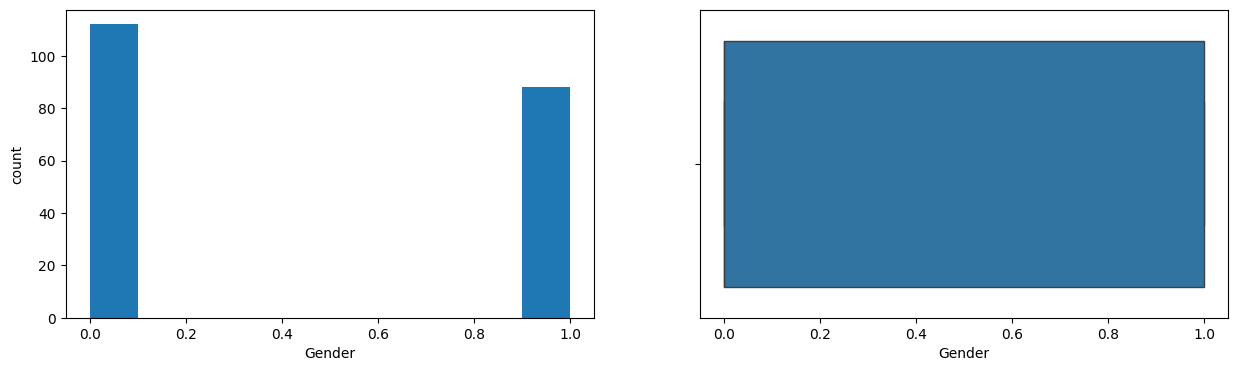

Age
Skew : 0.49


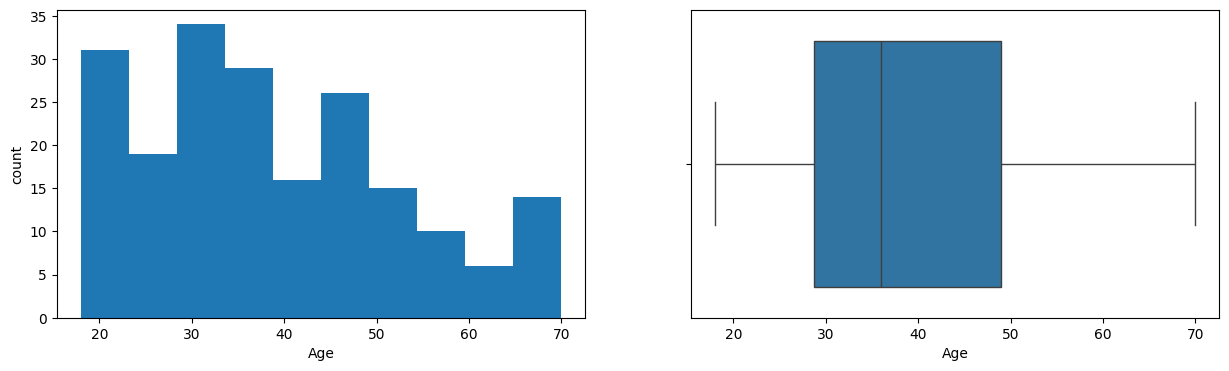

Annual Income (k$)
Skew : 0.32


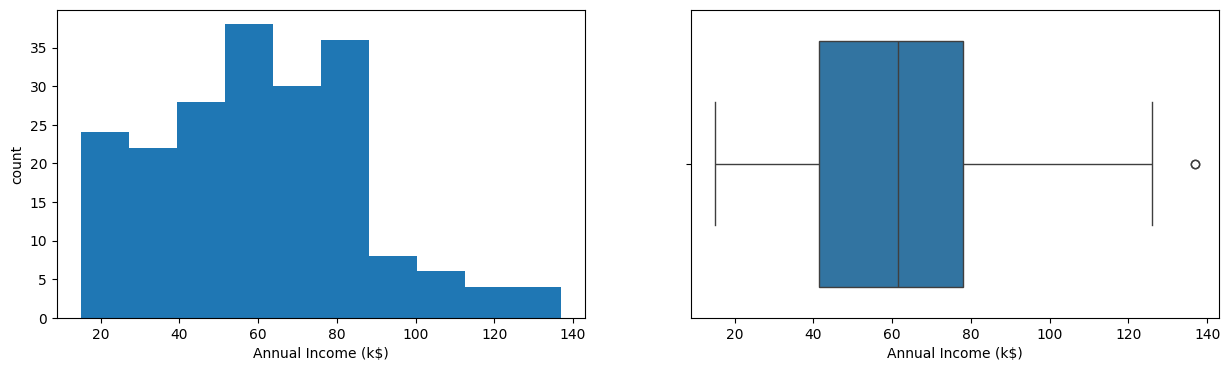

Spending Score (1-100)
Skew : -0.05


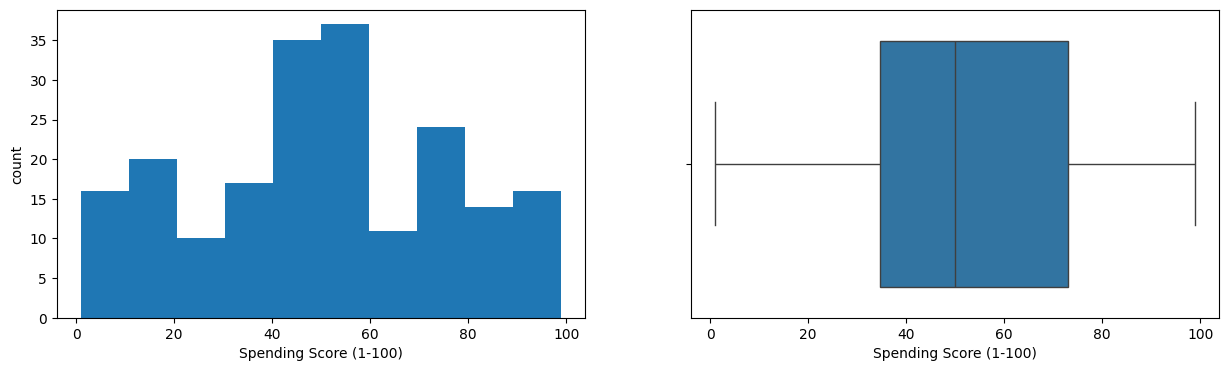

In [ ]:
import seaborn as sns

for col in data.columns[1:]:

    print(col)

    print('Skew :', round(data[col].skew(), 2))

    plt.figure(figsize = (15, 4))

    plt.subplot(1, 2, 1)

    data[col].hist(bins = 10, grid = False)

    plt.ylabel('count')

    plt.xlabel(col)

    plt.subplot(1, 2, 2)

    sns.boxplot(x = data[col])

    plt.show()

As observed earlier, most of the variables have skewed distributions except spending.
The distribution of the spending score is less skewed.
The distribution of income is skewed to left, which means most of the people are making less than 80k.
From box plot, about 50 % of the people are making 40k to 80k.

50 % of the people have spending score between 27 to 77.

50% of the people are between the age of 29 to 49, as box plot shows.

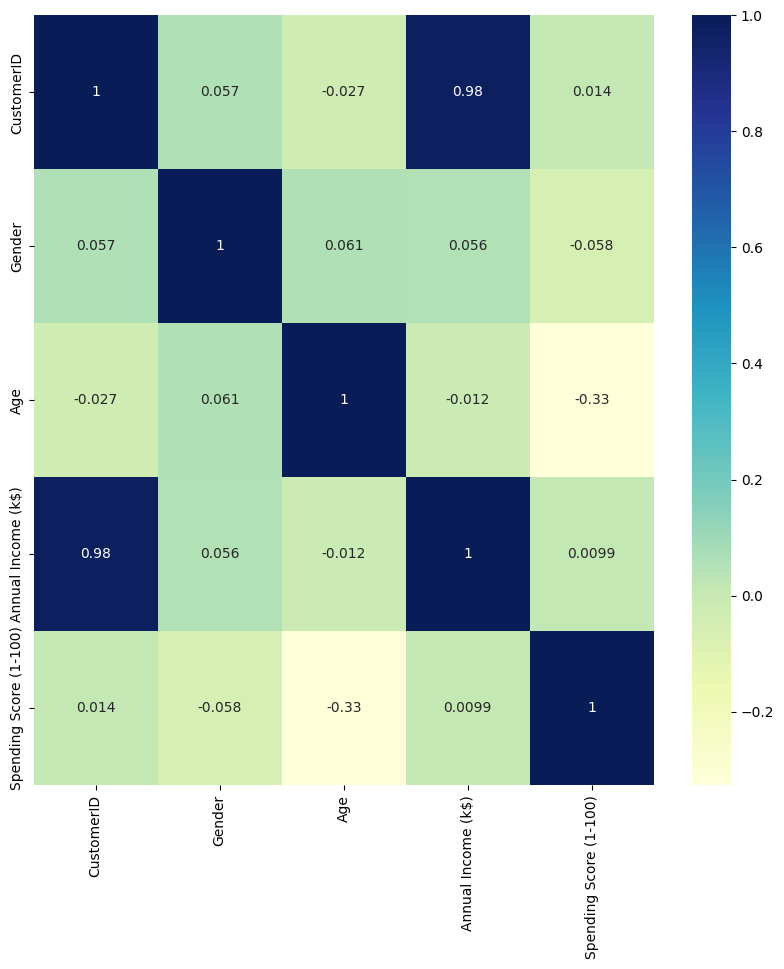

In [ ]:
plt.figure(figsize  = (10, 10))

sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

plt.show()

There is a strong co-relation, between gender and age and gender and income. Thee is also relatively strong co-relation between annual income and spending score.

**K-Means Clustering Implementation**

In [ ]:
# Select relevant features for clustering
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Apply KMeans clustering
num_clusters = 5  # This can be adjusted based on experimentation
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data['Cluster'].value_counts()

Cluster
0    81
4    39
1    35
2    23
3    22
Name: count, dtype: int64

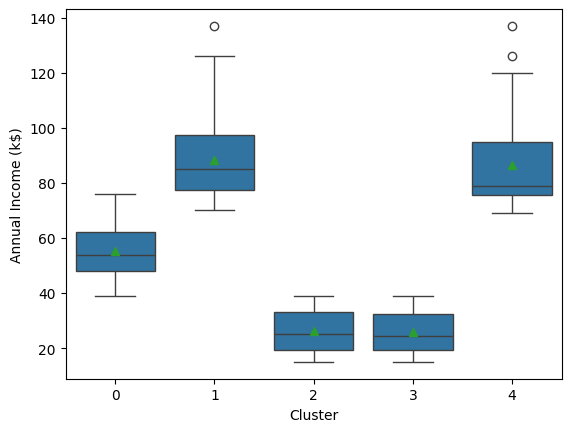

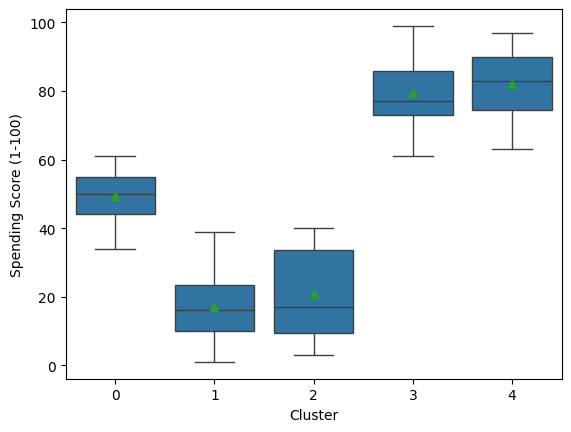

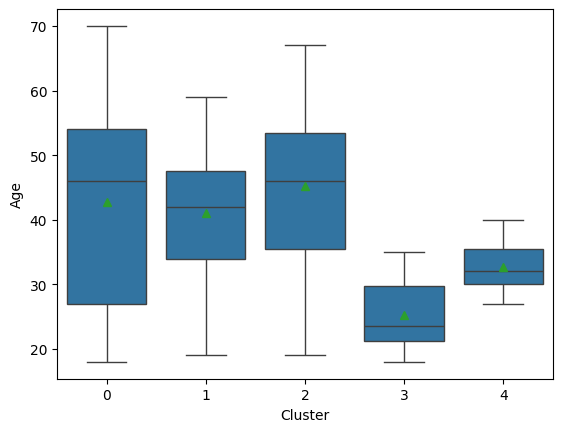

In [ ]:
cols_visualise = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']

for i, col in enumerate(cols_visualise):
    sns.boxplot(x = 'Cluster', y = col, data = data, showmeans=True)
    plt.show()


Cluster # 1:
   - 50 % of the people have income between 50k to 62k ,spending score between 45 to 55 and age range from 28 to 58.
   - This cluster has **average income** and **average spenders**.


Cluster # 2:
  - 50 % of the people have income between 78k to 98k , spending score between 10 to 25 and age between 35 to 45.
  - This cluster has **higher income** people with **low spending**.

Cluster # 3:
  - 50 % of the people have income between 20k to 30k and spending between 10
   to 30.
  - This cluster has **lower income** and **lower spending** people

Cluster # 4:
  - 50 % of the people have income in the range of 20k to 30k and spending
    score in the range between 70 to 90.
  - This cluster has **lower income** and **higher spending** and **young people ( 20 to 30)**

Cluster # 5:
  -  50 % of people have higher income in the range  75k to 95k. And spending
     score in the range of 70 to 90.
  - This cluster has **higher income **,  **higher spending.** and **mid age range people (30 to 35**

**Hierarchical Clustering**

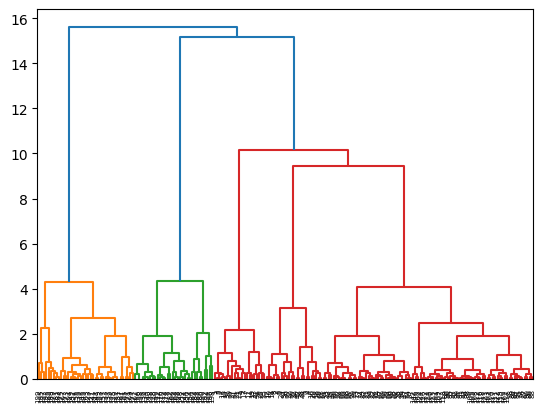

In [ ]:
# Prepare for Hierarchical Clustering
Z = linkage(scaled_data, 'ward')

dendrogram(Z)
plt.show()

### Introduction to Cluster Evaluation Techniques

In the realm of unsupervised machine learning, determining the optimal number of clusters is a pivotal decision that can significantly impact the outcomes of your model. Cluster evaluation techniques are essential tools that provide guidance in this decision-making process. Two of the most widely recognized methods for evaluating clustering results are the Elbow Method and the Silhouette Score.

#### Elbow Method
- **Explanation**: The Elbow Method is a heuristic used in determining the number of clusters in a data set. The approach involves plotting the explained variance as a function of the number of clusters, and picking the point where the increase in variance explained by adding another cluster is not significant anymore. This point is known as the 'elbow', where the graph bends.
- **Interpretation**: In the Elbow Method, one should look for a change in the gradient of the line plot; a sharp change like an elbow suggests the optimal number of clusters. The idea is that adding more clusters beyond this number does not provide much better modeling of the data.

#### Silhouette Score
- **Explanation**: The Silhouette Score is a metric used to calculate the goodness of a clustering technique. It measures the distance between points within a cluster and the distance to points in the next nearest cluster. The score ranges from -1 to +1, where a high value indicates that the points are well clustered.
- **Interpretation**: A Silhouette Score close to +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Both methods provide different lenses through which to view the clustering results and can be used in conjunction to make a more informed decision. The Elbow Method gives us an insight into the variance within each cluster, whereas the Silhouette Score provides a measure of how similar an object is to its own cluster compared to others. The optimal number of clusters is often the one that balances between the two measures, subject to the specific context and use case of the analysis.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

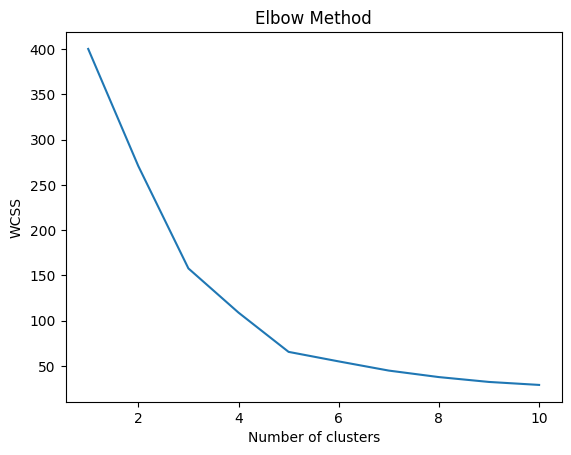

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


We can see from the plot that the elbow point is at 5. Thus, we can choose 5 as the optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

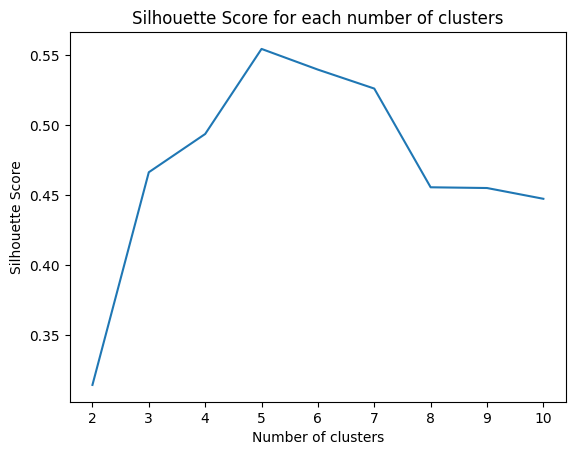

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score for each number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


We can see from the plot that the silhouette score is the highest for K=5. Thus we can choose 5 as the optimal number of clusters.

## Extra Credit Assignment (50 points total)

#### Advanced Clustering Techniques (20 points)
- **DBSCAN Clustering**:
  - Implement DBSCAN and compare its segmentation with K-Means and Hierarchical clustering.
  - Analyze the clusters formed by DBSCAN for any unique characteristics.
- **Points**: Quality of implementation and comparative analysis.

#### Dimensionality Reduction Technique (15 points)
- **Principal Component Analysis (PCA)**:
  - Apply PCA to the data and visualize the results.
  - Discuss how dimensionality reduction impacts the clustering results and its potential use in simplifying complex datasets.
- **Points**: Effectiveness of PCA implementation and analysis of its impact.

#### Real-world Application Scenario (15 points)
- **Scenario Development and Justification**:
  - Develop a detailed business scenario utilizing the clustered data.
  - Justify how the chosen segmentation and dimensionality reduction techniques can provide strategic insights in this scenario.
- **Points**: Creativity and practicality in scenario development and justification of techniques.